In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("training_2012.csv")
training = data.copy()
test = pd.read_csv("test_2012.csv")
training.sort_values(['case concept:name','event time:timestamp'] , inplace=True)
test.sort_values(['case concept:name','event time:timestamp'] , inplace=True)

#Creating a column with position
data['test'] = 1
data['position'] = data.groupby('case concept:name').agg({
    'test':'cumsum'
})

training['test'] = 1
training['position'] = training.groupby('case concept:name').agg({
    'test':'cumsum'
})

test['test'] = 1
test['position'] = training.groupby('case concept:name').agg({
    'test':'cumsum'
})

#Function to predict time difference
data['event time:timestamp'] =  pd.to_datetime(data['event time:timestamp'])
data['time_diff'] = data['event time:timestamp'].diff()
data.loc[data['position']==1,'time_diff']=pd.to_timedelta('0')
data['time_diff'] = data['time_diff'].shift(-1)

training['event time:timestamp'] =  pd.to_datetime(training['event time:timestamp'])
training['time_diff'] = training['event time:timestamp'].diff()
training.loc[training['position']==1,'time_diff']=pd.to_timedelta('0')
training['time_diff'] = training['time_diff'].shift(-1)

test['event time:timestamp'] =  pd.to_datetime(test['event time:timestamp'])
test['time_diff'] = test['event time:timestamp'].diff()
test.loc[test['position']==1,'time_diff']=pd.to_timedelta('0')
test['time_diff'] = test['time_diff'].shift(-1)

def predict_timediff(position):
    return str(training.loc[(training['position']==position)&(training['time_diff']>=pd.to_timedelta('0')),'time_diff'].mean())

In [2]:
df_knn = training.loc[:,['event concept:name', 'position', 'time_diff']]
df_knn['time_diff'] = df_knn['time_diff'].apply(lambda x : x.total_seconds()).dropna()

In [3]:

from sklearn.model_selection import train_test_split
X = df_knn.iloc[:,1:]
y = df_knn['event concept:name']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [4]:
X_train

,position,time_diff
18238,18,1.121
198390,9,160.924
66611,25,1191790.940
16738,3,0.000
56695,22,658678.210
...,...,...
109140,22,19.813
1242,9,164.240
53167,67,50899.525
141953,2,8852.021


In [5]:
y_train

18238                W_Nabellen offertes
198390    W_Nabellen incomplete dossiers
66611                W_Nabellen offertes
16738                         A_DECLINED
56695             W_Completeren aanvraag
                       ...              
109140               W_Nabellen offertes
1242              W_Completeren aanvraag
53167     W_Nabellen incomplete dossiers
141953            W_Completeren aanvraag
117982                         O_CREATED
Name: event concept:name, Length: 167808, dtype: object

In [6]:
df_knn.dropna(inplace=True)
y.unique()

array(['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
       'W_Completeren aanvraag', 'A_ACCEPTED', 'O_SELECTED',
       'A_FINALIZED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes',
       'O_SENT_BACK', 'W_Valideren aanvraag', 'O_ACCEPTED',
       'A_REGISTERED', 'A_APPROVED', 'A_ACTIVATED', 'O_CANCELLED',
       'W_Wijzigen contractgegevens', 'A_DECLINED', 'A_CANCELLED',
       'W_Afhandelen leads', 'O_DECLINED',
       'W_Nabellen incomplete dossiers', 'W_Beoordelen fraude'],
      dtype=object)

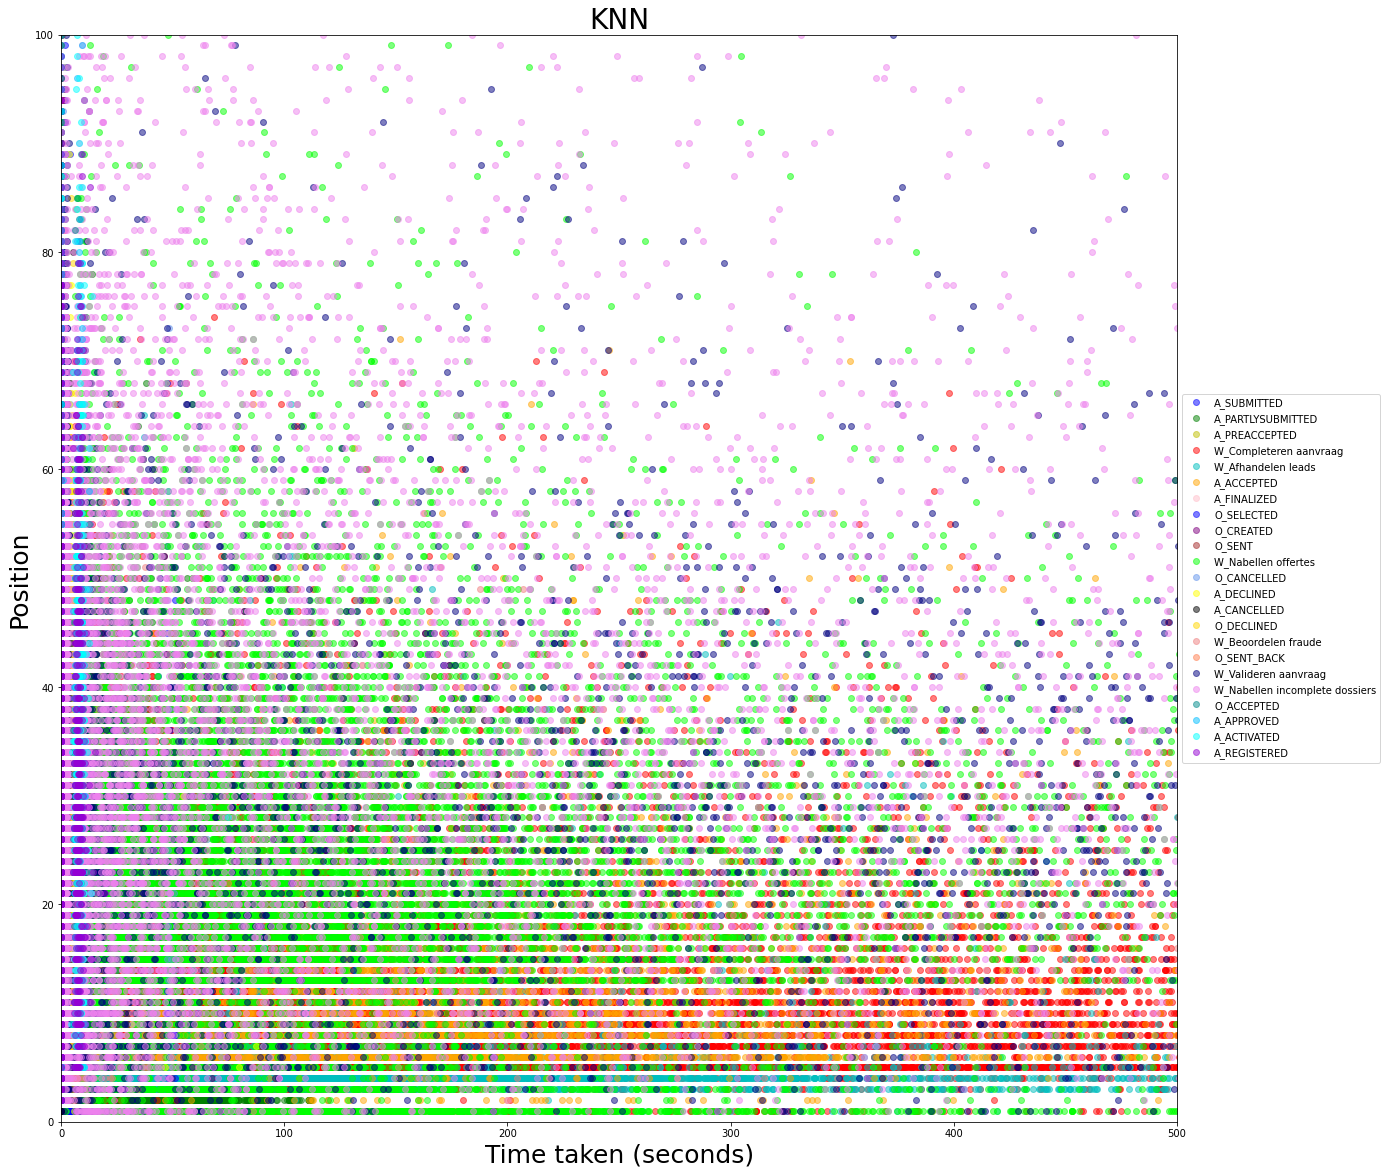

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
plt.figure(figsize=(20,20))
plt.plot(X_train.loc[y_train=='A_SUBMITTED']['time_diff'],X_train.loc[y_train=='A_SUBMITTED']['position'], "bo", label = 'A_SUBMITTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_PARTLYSUBMITTED']['time_diff'],X_train.loc[y_train=='A_PARTLYSUBMITTED']['position'], "go", label = 'A_PARTLYSUBMITTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_PREACCEPTED']['time_diff'],X_train.loc[y_train=='A_PREACCEPTED']['position'], "yo", label = 'A_PREACCEPTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Completeren aanvraag']['time_diff'],X_train.loc[y_train=='W_Completeren aanvraag']['position'], "ro", label = 'W_Completeren aanvraag', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Afhandelen leads']['time_diff'],X_train.loc[y_train=='W_Afhandelen leads']['position'], "co", label = 'W_Afhandelen leads', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_ACCEPTED']['time_diff'],X_train.loc[y_train=='A_ACCEPTED']['position'], "o",c='orange', label = 'A_ACCEPTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_FINALIZED']['time_diff'],X_train.loc[y_train=='A_FINALIZED']['position'], "o",c='pink', label = 'A_FINALIZED', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_SELECTED']['time_diff'],X_train.loc[y_train=='O_SELECTED']['position'], "o",c='blue', label = 'O_SELECTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_CREATED']['time_diff'],X_train.loc[y_train=='O_CREATED']['position'], "o",c='purple', label = 'O_CREATED', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_SENT']['time_diff'],X_train.loc[y_train=='O_SENT']['position'], "o",c='brown', label = 'O_SENT', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Nabellen offertes']['time_diff'],X_train.loc[y_train=='W_Nabellen offertes']['position'], "o",c='lime', label = 'W_Nabellen offertes', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_CANCELLED']['time_diff'],X_train.loc[y_train=='O_CANCELLED']['position'], "o",c='cornflowerblue', label = 'O_CANCELLED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_DECLINED']['time_diff'],X_train.loc[y_train=='A_DECLINED']['position'], "o",c='yellow', label = 'A_DECLINED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_CANCELLED']['time_diff'],X_train.loc[y_train=='A_CANCELLED']['position'], "o",c='black', label = 'A_CANCELLED', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_DECLINED']['time_diff'],X_train.loc[y_train=='O_DECLINED']['position'], "o",c='gold', label = 'O_DECLINED', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Beoordelen fraude']['time_diff'],X_train.loc[y_train=='W_Beoordelen fraude']['position'], "o",c='lightcoral', label = 'W_Beoordelen fraude', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_SENT_BACK']['time_diff'],X_train.loc[y_train=='O_SENT_BACK']['position'], "o",c='coral', label = 'O_SENT_BACK', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Valideren aanvraag']['time_diff'],X_train.loc[y_train=='W_Valideren aanvraag']['position'], "o",c='navy', label = 'W_Valideren aanvraag', alpha=0.5)
plt.plot(X_train.loc[y_train=='W_Nabellen incomplete dossiers']['time_diff'],X_train.loc[y_train=='W_Nabellen incomplete dossiers']['position'], "o",c='violet', label = 'W_Nabellen incomplete dossiers', alpha=0.5)
plt.plot(X_train.loc[y_train=='O_ACCEPTED']['time_diff'],X_train.loc[y_train=='O_ACCEPTED']['position'], "o",c='darkcyan', label = 'O_ACCEPTED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_APPROVED']['time_diff'],X_train.loc[y_train=='A_APPROVED']['position'], "o",c='deepskyblue', label = 'A_APPROVED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_ACTIVATED']['time_diff'],X_train.loc[y_train=='A_ACTIVATED']['position'], "o",c='cyan', label = 'A_ACTIVATED', alpha=0.5)
plt.plot(X_train.loc[y_train=='A_REGISTERED']['time_diff'],X_train.loc[y_train=='A_REGISTERED']['position'], "o",c='darkviolet', label = 'A_REGISTERED', alpha=0.5)
plt.xlabel("Time taken (seconds)", size=25)
plt.ylabel("Position", size=25)
plt.xlim(0,500)
plt.ylim(0,100)
plt.legend(fontsize='large')
plt.title("KNN", size=28)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
y.dropna(inplace=True)

In [9]:
X.dropna(inplace=True)


In [10]:
X = X.reshape[1:]

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
y = y.head(209759)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, p=2)
knn_clf.fit(X, y)

In [ ]:
knn_clf.kneighbors(X_test[:2])

In [ ]:
knn_clf.predict_proba(X_test[:2])

In [ ]:
knn_clf.predict(X_test[:2])

In [ ]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
knn_clf.score(X_test, y_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, sharey=True, sharex=True, figsize=(20,10))
training.plot(kind='scatter', x='event time:timestamp', y='case concept:name', c='blue', alpha=0.1, ax=ax[0])
test.plot(kind='scatter', x='event time:timestamp', y='case concept:name', c='orange    ', alpha=0.1, ax=ax[1]);

In [ ]:
fig, ax = plt.subplots(ncols=1, sharey=True, sharex=True, figsize=(20,10))

ax1 = sns.scatterplot(data=training, x='event time:timestamp', y='case concept:name');
ax2 =sns.scatterplot(data=test, x='event time:timestamp', y='case concept:name').set_title("Tranining and Test Split plot", size = 20)
fig.legend(labels=['Training','Test'],loc='center right');